<a href="https://colab.research.google.com/github/Furkan-Keser/Karma-k-A-Analizi/blob/main/Colab'e_ho%C5%9F_geldiniz_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving InputFileEdges.csv to InputFileEdges.csv
Saving InputFileNodes.csv to InputFileNodes.csv


In [4]:
import pandas as pd
nodes = pd.read_csv("InputFileNodes.csv")
print(nodes.columns)


Index(['id', 'media', 'media.type', 'type.label', 'audience.size'], dtype='object')


In [11]:
import pandas as pd

df_nodes = pd.read_csv("InputFileNodes.csv")

node_list = df_nodes['id'].tolist()

print("1. Soru – Node Listesi:")
print(node_list)


1. Soru – Node Listesi:
['s01', 's02', 's03', 's04', 's05', 's06', 's07', 's08', 's09', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17']


In [6]:
edges = pd.read_csv("InputFileEdges.csv")

print("Edges kolonları:", edges.columns.tolist())

edge_list = list(zip(edges["from"], edges["to"]))

print("2. Soru Çıktısı - Kenar Listesi:")
print(edge_list)


Edges kolonları: ['from', 'to', 'weight', 'type']
2. Soru Çıktısı - Kenar Listesi:
[('s01', 's02'), ('s01', 's02'), ('s01', 's03'), ('s01', 's04'), ('s04', 's11'), ('s05', 's15'), ('s06', 's17'), ('s08', 's09'), ('s08', 's09'), ('s03', 's04'), ('s04', 's03'), ('s01', 's15'), ('s15', 's01'), ('s15', 's01'), ('s16', 's17'), ('s16', 's06'), ('s06', 's16'), ('s09', 's10'), ('s08', 's07'), ('s07', 's08'), ('s07', 's10'), ('s05', 's02'), ('s02', 's03'), ('s02', 's01'), ('s03', 's01'), ('s12', 's13'), ('s12', 's14'), ('s14', 's13'), ('s13', 's12'), ('s05', 's09'), ('s02', 's10'), ('s03', 's12'), ('s04', 's06'), ('s10', 's03'), ('s03', 's10'), ('s04', 's12'), ('s13', 's17'), ('s14', 's11'), ('s03', 's11'), ('s12', 's06'), ('s04', 's17'), ('s17', 's04'), ('s08', 's03'), ('s03', 's08'), ('s07', 's14'), ('s15', 's06'), ('s15', 's04'), ('s05', 's01'), ('s02', 's09'), ('s03', 's05'), ('s07', 's03')]


In [7]:
edge_list = list(set(edge_list))

print("3. Soru Çıktısı - Tekrarsız Kenar Listesi:")
print(edge_list)


3. Soru Çıktısı - Tekrarsız Kenar Listesi:
[('s01', 's03'), ('s03', 's01'), ('s17', 's04'), ('s15', 's01'), ('s14', 's13'), ('s02', 's10'), ('s13', 's17'), ('s16', 's06'), ('s06', 's16'), ('s07', 's03'), ('s01', 's02'), ('s03', 's08'), ('s05', 's01'), ('s07', 's08'), ('s04', 's11'), ('s03', 's12'), ('s04', 's17'), ('s01', 's04'), ('s12', 's14'), ('s12', 's13'), ('s13', 's12'), ('s12', 's06'), ('s07', 's14'), ('s04', 's03'), ('s08', 's07'), ('s15', 's06'), ('s01', 's15'), ('s15', 's04'), ('s03', 's04'), ('s05', 's02'), ('s02', 's01'), ('s03', 's10'), ('s04', 's12'), ('s02', 's03'), ('s10', 's03'), ('s03', 's05'), ('s05', 's09'), ('s14', 's11'), ('s07', 's10'), ('s08', 's03'), ('s09', 's10'), ('s04', 's06'), ('s16', 's17'), ('s05', 's15'), ('s03', 's11'), ('s02', 's09'), ('s06', 's17'), ('s08', 's09')]


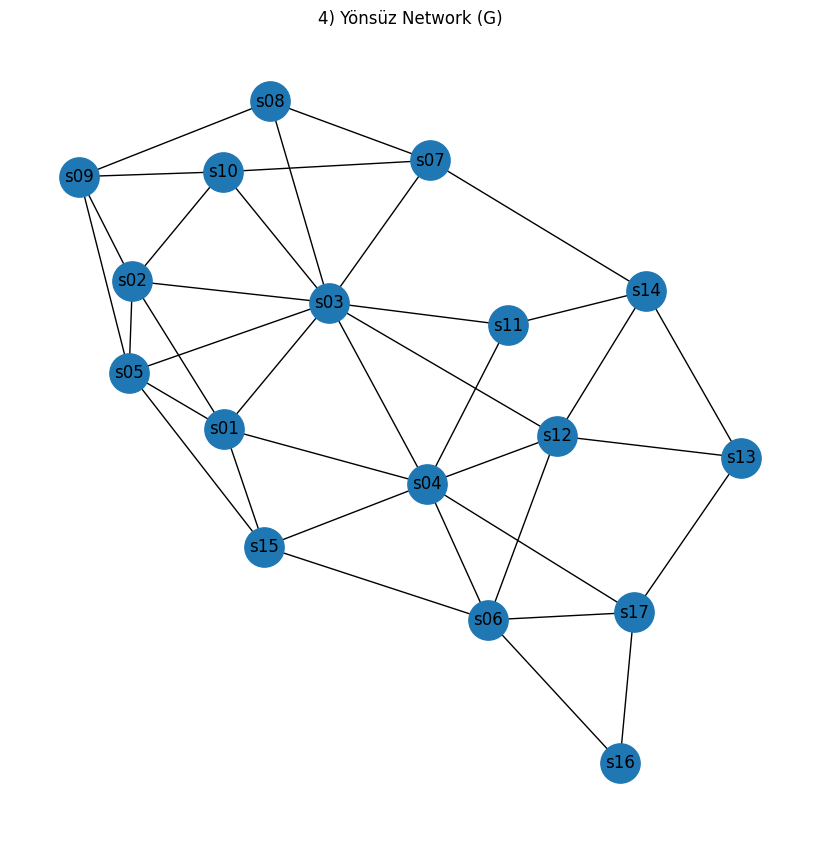

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(node_list)
G.add_edges_from(edge_list)

plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, node_size=800)
plt.title("4) Yönsüz Network (G)")
plt.show()



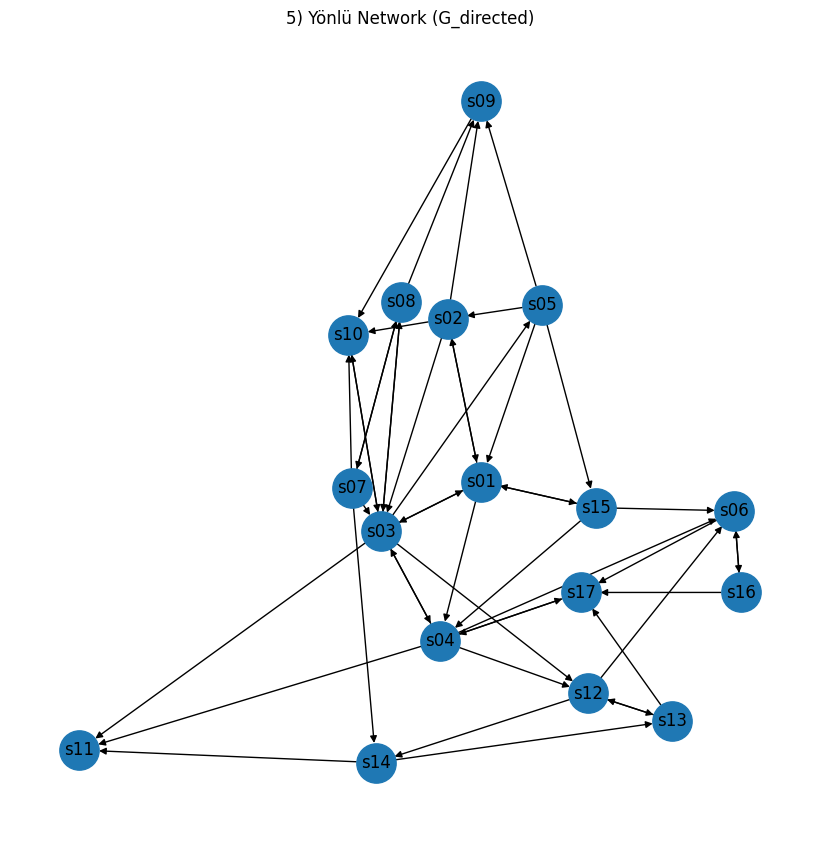

In [13]:
G_directed = nx.DiGraph()
G_directed.add_nodes_from(node_list)
G_directed.add_edges_from(edge_list)

plt.figure(figsize=(8, 8))
nx.draw(G_directed, with_labels=True, node_size=800)
plt.title("5) Yönlü Network (G_directed)")
plt.show()


In [14]:
degrees = dict(G.degree())
print("6) Dereceler:", degrees)


6) Dereceler: {'s01': 5, 's02': 5, 's03': 9, 's04': 7, 's05': 5, 's06': 5, 's07': 4, 's08': 3, 's09': 4, 's10': 4, 's11': 3, 's12': 5, 's13': 3, 's14': 4, 's15': 4, 's16': 2, 's17': 4}


In [15]:
avg_degree = sum(degrees.values()) / len(degrees)
print("7) Ortalama derece:", avg_degree)


7) Ortalama derece: 4.470588235294118


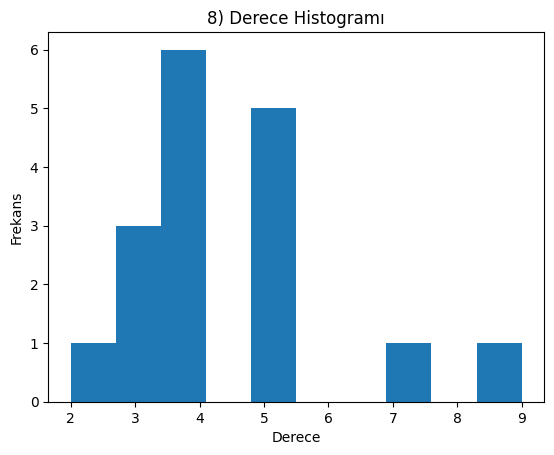

In [16]:
plt.hist(list(degrees.values()))
plt.title("8) Derece Histogramı")
plt.xlabel("Derece")
plt.ylabel("Frekans")
plt.show()


In [17]:
deg_cent = nx.degree_centrality(G)
print("9) Degree Centrality:", deg_cent)


9) Degree Centrality: {'s01': 0.3125, 's02': 0.3125, 's03': 0.5625, 's04': 0.4375, 's05': 0.3125, 's06': 0.3125, 's07': 0.25, 's08': 0.1875, 's09': 0.25, 's10': 0.25, 's11': 0.1875, 's12': 0.3125, 's13': 0.1875, 's14': 0.25, 's15': 0.25, 's16': 0.125, 's17': 0.25}


In [18]:
clo_cent = nx.closeness_centrality(G)
print("10) Closeness Centrality:", clo_cent)


10) Closeness Centrality: {'s01': 0.5333333333333333, 's02': 0.48484848484848486, 's03': 0.6666666666666666, 's04': 0.6153846153846154, 's05': 0.5161290322580645, 's06': 0.5, 's07': 0.48484848484848486, 's08': 0.45714285714285713, 's09': 0.41025641025641024, 's10': 0.47058823529411764, 's11': 0.5161290322580645, 's12': 0.5714285714285714, 's13': 0.43243243243243246, 's14': 0.47058823529411764, 's15': 0.48484848484848486, 's16': 0.35555555555555557, 's17': 0.45714285714285713}


In [19]:
bet_cent = nx.betweenness_centrality(G)
print("11) Betweenness Centrality:", bet_cent)


11) Betweenness Centrality: {'s01': 0.039146825396825395, 's02': 0.025992063492063486, 's03': 0.3404166666666666, 's04': 0.19566468253968256, 's05': 0.0654563492063492, 's06': 0.10018849206349206, 's07': 0.050277777777777775, 's08': 0.019593253968253968, 's09': 0.017361111111111112, 's10': 0.025843253968253963, 's11': 0.017916666666666664, 's12': 0.12271825396825398, 's13': 0.02111111111111111, 's14': 0.049166666666666664, 's15': 0.05621031746031746, 's16': 0.0, 's17': 0.05293650793650794}


In [20]:
eig_cent = nx.eigenvector_centrality(G)
print("12) Eigenvector Centrality:", eig_cent)


12) Eigenvector Centrality: {'s01': 0.31914086837291605, 's02': 0.2910340882293078, 's03': 0.4485472979675353, 's04': 0.3528334611736863, 's05': 0.2925525270528745, 's06': 0.20688820586442142, 's07': 0.1936188619934287, 's08': 0.1646295034122241, 's09': 0.1915922923064456, 's10': 0.22209545169996198, 's11': 0.1869275012952371, 's12': 0.248809538829334, 's13': 0.1065065446362404, 's14': 0.14530038460965825, 's15': 0.23130251528184956, 's16': 0.06953859174549203, 's17': 0.14528213666865794}


In [21]:
katz_cent = nx.katz_centrality(G, alpha=0.1, beta=1.0)
print("13) Katz Centrality:", katz_cent)


13) Katz Centrality: {'s01': 0.2661899362600269, 's02': 0.2585214899019339, 's03': 0.3478901119580387, 's04': 0.30380429431829614, 's05': 0.2586965664429264, 's06': 0.2442980877842754, 's07': 0.22594164043918727, 's08': 0.20549255350345036, 's09': 0.2213771859350646, 's10': 0.23134469376305403, 's11': 0.21263834616088173, 's12': 0.25655543343513715, 's13': 0.19487287897431285, 's14': 0.21497249250773132, 's15': 0.2332705380212911, 's16': 0.17214990077487383, 's17': 0.21748417879464038}


In [22]:
pr_cent = nx.pagerank(G)
print("14) PageRank:", pr_cent)


14) PageRank: {'s01': 0.06204637381280079, 's02': 0.06272260072993852, 's03': 0.10859250508679344, 's04': 0.08717621121216261, 's05': 0.06264996790811553, 's06': 0.0675150817299408, 's07': 0.053892600371121605, 's08': 0.041823390193332345, 's09': 0.053139414277089236, 's10': 0.05248605242933425, 's11': 0.041475517613611415, 's12': 0.06538770928759405, 's13': 0.043885479169175526, 's14': 0.055577437164209834, 's15': 0.05208526058634631, 's16': 0.03243691230176872, 's17': 0.05710748612666504}


In [23]:
from networkx.algorithms.community import greedy_modularity_communities

communities = greedy_modularity_communities(G)

# Modularity hesapla
modularity_value = nx.algorithms.community.quality.modularity(G, communities)

print("15) Modularity:", modularity_value)


15) Modularity: 0.3244459833795013


In [24]:
density = nx.density(G)
print("16) Density:", density)


16) Density: 0.27941176470588236


In [25]:
avg_clustering = nx.average_clustering(G)
print("17) Average Clustering:", avg_clustering)


17) Average Clustering: 0.4205882352941176


In [26]:
if nx.is_connected(G):
    diameter = nx.diameter(G)
    print("18) Diameter:", diameter)
else:
    print("18) Diameter hesaplanamadı: Graph bağlı değil.")


18) Diameter: 4


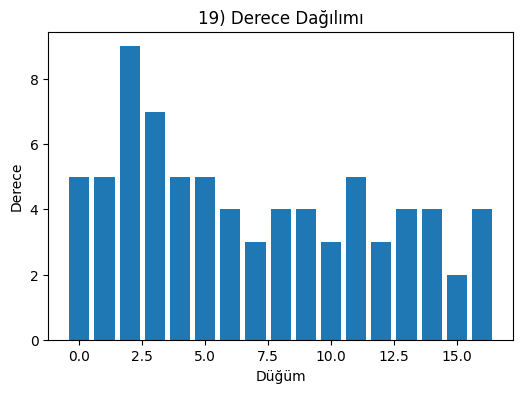

In [27]:
degree_values = list(degrees.values())

plt.figure(figsize=(6,4))
plt.bar(range(len(degree_values)), degree_values)
plt.title("19) Derece Dağılımı")
plt.xlabel("Düğüm")
plt.ylabel("Derece")
plt.show()


In [28]:
top_5_bridge = sorted(bet_cent.items(), key=lambda x: x[1], reverse=True)[:5]
print("21) En Kritik 5 Köprü Düğüm:", top_5_bridge)


21) En Kritik 5 Köprü Düğüm: [('s03', 0.3404166666666666), ('s04', 0.19566468253968256), ('s12', 0.12271825396825398), ('s06', 0.10018849206349206), ('s05', 0.0654563492063492)]


In [29]:
top_5_leaders = sorted(eig_cent.items(), key=lambda x: x[1], reverse=True)[:5]
print("22) En Kritik 5 Lider Düğüm:", top_5_leaders)


22) En Kritik 5 Lider Düğüm: [('s03', 0.4485472979675353), ('s04', 0.3528334611736863), ('s01', 0.31914086837291605), ('s05', 0.2925525270528745), ('s02', 0.2910340882293078)]


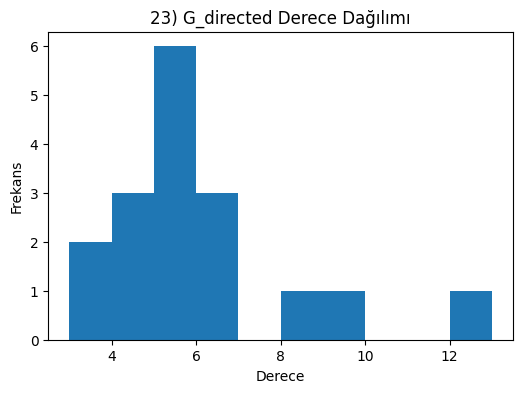

In [30]:
directed_degrees = dict(G_directed.degree())

plt.figure(figsize=(6,4))
plt.hist(list(directed_degrees.values()))
plt.title("23) G_directed Derece Dağılımı")
plt.xlabel("Derece")
plt.ylabel("Frekans")
plt.show()


24) Silinen En Güçlü 3 Düğüm: ['s03', 's04', 's01']


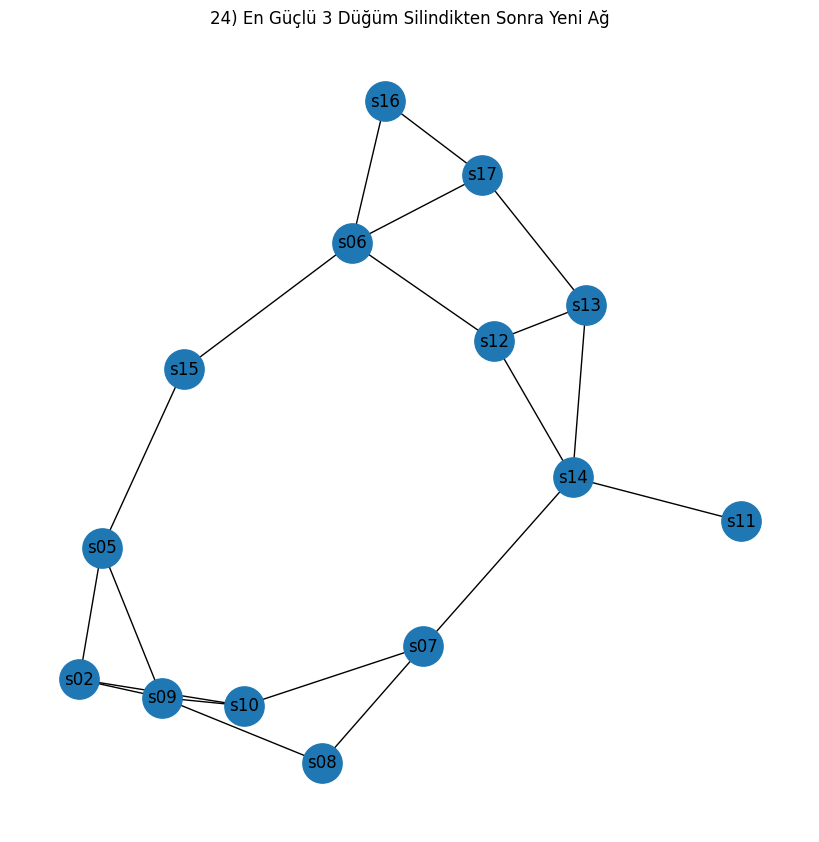

In [31]:
top3 = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)[:3]
top3_nodes = [x[0] for x in top3]

print("24) Silinen En Güçlü 3 Düğüm:", top3_nodes)

G_removed = G.copy()
G_removed.remove_nodes_from(top3_nodes)

plt.figure(figsize=(8, 8))
nx.draw(G_removed, with_labels=True, node_size=800)
plt.title("24) En Güçlü 3 Düğüm Silindikten Sonra Yeni Ağ")
plt.show()
